In [48]:
import pandas
import seaborn
from math import sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test a Perceptual Phenomenon

### The Stroop Test

The Stroop test involves showing color words to the participant, where the words are printed in a color. The color can either be printed congruously, <font color='green'>Green</font> <font color='red'>Red</font> <font color='blue'>Blue</font>, or incongruously, <font color='brown'>Green</font> <font color='purple'>Red</font> <font color='red'>Blue</font>. The participant must say the words color, and the time it takes them to get the correct color is recorded.

In this project we examine two samples using a statistical test to determine if the difference is statistically significant.

### 1. What is our independent variable? What is our dependent variable?

- Our independant variable is the configuration of the words and their colors, in this test we have the congruent and incongruent samples.
- The dependant variable is the time it takes for the participant to correctly identify all the colors.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Since we have samples under two different conditions but no information about the general population, a dependent sample t-test is required. First, we have to decide whether to do a one-tailed or two-tailed test. In this case, a two tailed test is appropriate because we do not have much information about the direction of the effect. In this case, the null hypothesis will be that the mean of the two populations are the same. The alternative hypothesis is that the two populations have a statistically significant difference.

$$H_0:\mu_i - \mu_c = 0 $$
$$H_A:\mu_i - \mu_c \neq 0$$

Where:  
$\mu_i$ is the population mean of the incongruent case  
$\mu_c$ is the population mean of the congruent case

Key assumptions of using this t test are that the populations are normally distributed, that the samples are randomly drawn, and that we have large enough sample size.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

After performing the stroop test myself, I recorded a value of 13.048 for the congruent test and 19.848 for the incongruent test. We will move on to analyzing the profided data. First we will read in the data using pandas.

In [9]:
stroop_data = pandas.read_csv('stroopdata.csv')

stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


We can see that there are two columns, one for congruent data and one for incongruent data. Next we will add a column for the difference of the two columns and then provide some statistics.

In [20]:
stroop_data['Difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']

stroop_data.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


Looking at the descriptive data, we see that there are 24 total samples. The mean time for the congruent case is 14.05 seconds with a sample standard deviation of 3.56 seconds. For the incongruent case, the mean time is 22.02 seconds with a standard deviation of 4.80 seconds.

From the difference column we can get a point estimate of the mean difference, 7.96, as well as the standard deviation of the difference, 4.86.

To summarize:
$$\bar{x}_i - \bar{x}_c = 7.96$$
$$s_D = 4.86$$

Where:  
$\bar{x}_i$ is the sample mean of the incongruent case  
$\bar{x}_c$ is the sample mean of the congruent case  
$s_D$ is the standard deviation of the difference

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

We can easily make histograms for each of our variables, starting with the congruent case.

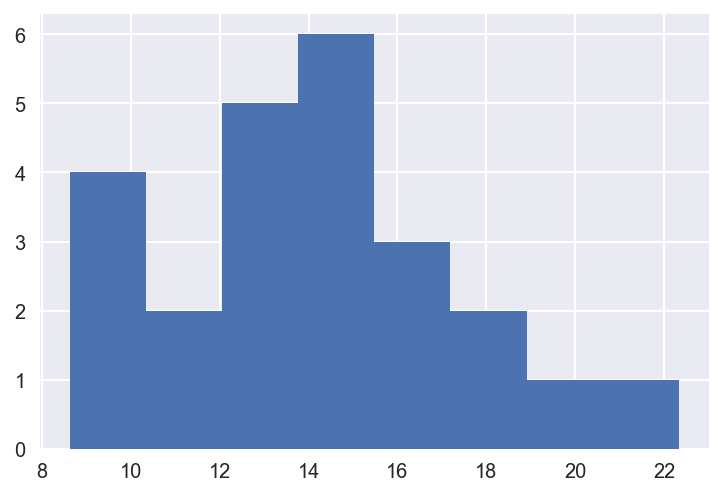

In [43]:
stroop_data['Congruent'].hist(bins = 8)

Taking a look at the congruent case, we see that the data is faily well distributed with a high point at about 15 seconds. There are several points lower than 10 seconds which might skew the distribution.

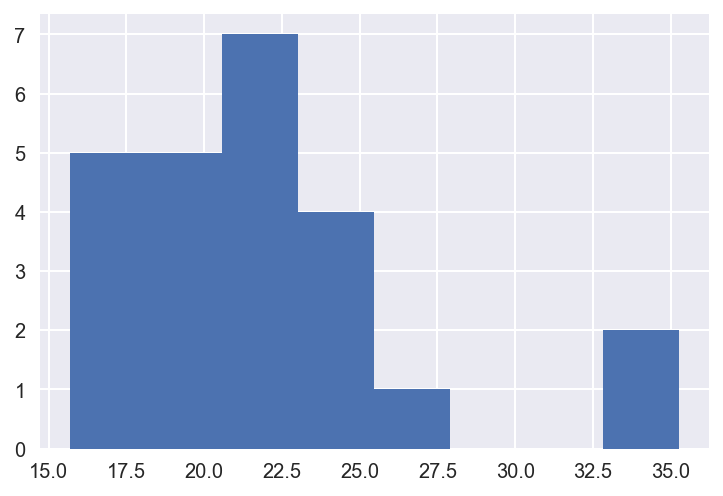

In [44]:
stroop_data['Incongruent'].hist(bins = 8)

Taking a look at the distribution of the incongruent case, we see again that it is fairly normally distributed. However, this time the outliers are high with values between 32.5 and 35 seconds. Overall both distributions should work for the statistical test.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [55]:
sem = stroop_data['Difference'].std() / sqrt(stroop_data['Difference'].count())
sem

0.99302863477834058

To perform the t test, first we need to calculate the standard error. For the dependent sample t-test, the standard error is as follows:

$$SEM = \frac{s_D}{\sqrt{n}} = \frac{4.86}{\sqrt{24}} = 0.99$$

Where:  
$SEM$ is the standard error  
$n$ is the number of samples

In [52]:
stroop_data['Difference'].mean() / sem

8.020706944109957

Next, we calculate the t-statistic as follows:

$$ t = \frac{\bar{x}_i - \bar{x}_c}{SEM} = \frac{7.96}{0.99} = 8.04$$

Where:  
$t$ is the t-statistic

Note that when you calculate without rounding you get a slightly different value:
$$t = 8.02$$

Now we have to choose a t-critical value. With a t-statistic of $8.02$ we are off the end of the t table. We can choose an extremely high alpha value and still have a statistically significant result. With this in mind we will select $\alpha = 0.001$. With $n = 24$, we have $23$ degrees of freedom. This means the t-critical value is $\pm3.768$ for a two tailed t test. To summarize:

$$ t = 8.02 $$
$$ \alpha = 0.001$$
$$ df = 23 $$
$$t_{crit} = \pm3.768$$

Where:  
$\alpha$ is the significance level  
$df$ is the degrees of freedom  
$t_{crit}$ is the critical t-statistic

Since the t statistics is much higher than the critical value, we will reject $H_0$ with $p < 0.001$.
$$ t > t_{crit}: Reject\;  H_0$$

Rejecting the null hypothesis provides evidence for the Stroop effect implying that reaction time is slower when presented with incongruent stimulus. This makes sense with my expectations that the time would be longer for the task with the colors different than the written words.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Several hypothesis exist for why the incongruous case takes longer to correctly say than the congruous case. Also, studies have shown that congruent case is faster than a neutral case. One prominent hypothesis is that the cognitive load of the task correlates with the time taken to complete it correctly. With incongruent stimulus, the cognitive load is higher so it takes longer to say the correct color.

Other tests that might be used to have varying amounts of cognitive load when saying the color:  
- Have a voice saying a correct or incorrect color when showing the colored words
- Change the orientation of the words
- Use words that are not related to the colors at all

I'm sure there are many other possible tests, but those are just a few ideas!

### Sources:

https://en.wikipedia.org/wiki/Stroop_effect  
http://psychclassics.yorku.ca/Stroop/  
https://imotions.com/blog/the-stroop-effect/